In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import RidgeClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [11]:
df = pd.read_csv('Waves_2023.txt', sep='\s+') # , delim_whitespace=True will be depreciated in future versions

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Thaomy\AppData\Local\Temp\ipykernel_23604\4131130105.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('Waves_2023.txt', sep='\s+') # , delim_whitespace=True will be depreciated in future versions


In [12]:
df

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2023,1,1,0,26,999,99.0,99.0,1.12,12.50,7.69,269,9999.0,999.0,15.3,999.0,99.0,99.0
1,2023,1,1,0,56,999,99.0,99.0,1.16,11.76,7.34,272,9999.0,999.0,15.3,999.0,99.0,99.0
2,2023,1,1,1,26,999,99.0,99.0,1.20,12.50,7.08,268,9999.0,999.0,15.3,999.0,99.0,99.0
3,2023,1,1,1,56,999,99.0,99.0,1.25,10.53,7.33,268,9999.0,999.0,15.4,999.0,99.0,99.0
4,2023,1,1,2,26,999,99.0,99.0,1.27,10.53,7.57,268,9999.0,999.0,15.5,999.0,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17280,2023,12,31,21,56,999,99.0,99.0,2.01,14.29,11.19,270,9999.0,999.0,16.7,999.0,99.0,99.0
17281,2023,12,31,22,26,999,99.0,99.0,1.75,15.38,10.37,267,9999.0,999.0,16.7,999.0,99.0,99.0
17282,2023,12,31,22,56,999,99.0,99.0,1.79,13.33,10.50,268,9999.0,999.0,16.8,999.0,99.0,99.0
17283,2023,12,31,23,26,999,99.0,99.0,1.66,14.29,10.32,271,9999.0,999.0,16.8,999.0,99.0,99.0


In [13]:
Xvar = df[['DPD','APD','MWD','WTMP']].to_numpy()

In [14]:
Xvar

array([[ 12.5 ,   7.69, 269.  ,  15.3 ],
       [ 11.76,   7.34, 272.  ,  15.3 ],
       [ 12.5 ,   7.08, 268.  ,  15.3 ],
       ...,
       [ 13.33,  10.5 , 268.  ,  16.8 ],
       [ 14.29,  10.32, 271.  ,  16.8 ],
       [ 12.5 ,  10.54, 271.  ,  16.9 ]])

In [15]:
yvar = np.array(df['WVHT'])

In [16]:
yvar

array([1.12, 1.16, 1.2 , ..., 1.79, 1.66, 1.7 ])

### Questions and Answers
1. Both the decision tree regressor and random forest regressor produced much smaller errors on training, validation, and test datasets than the baseline linear regression model. The random forest regressor had the best performance, with mean squared errors of 0.02999422812928174, 
0.02863739750848991, and 
0.0260359739624959 for training, validation, and test dataset respectively. This is nearly one order of magnitude smaller than the MSE of the decision tree regressor and nearly two order of magnitude smaller than the MSE of the linear model.
2. The cost function of LinearRegression is Ordinary Least Squares (OLS). The cost function of both DecisionTreeRegressor and RandomForestRegressor is squared_error of the Mean Squared Error (MSE).
3. For the decision tree regressor, I chose a max depth of 5. For the random forest regressor, I chose 25 estimators of "trees".
4. After redoing the splits, the mean squared errors are slightly different but the random forest regressor remained the best model with the lowest MSE.
5. graph at the very bottom
6. I do not have evidence of overfitting because the difference between the training error and the validation error stays the same as the number of trees increase. If overfitting did occur, we would expect this difference to increase as the training error decreases to near zero and the validation error grows bigger.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# I want 75% train, 10% test, 15% validate
X, X_test, y, y_test = train_test_split(Xvar, yvar, test_size=0.10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.167)

In [42]:
from sklearn.metrics import mean_squared_error

### Baseline: Linear Model

In [44]:
linear = linear_model.LinearRegression()
linear.fit(X_train, y_train)
y_train_pred = linear.predict(X_train)
y_val_pred = linear.predict(X_val)
y_test_pred = linear.predict(X_test)
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_val, y_val_pred))
print(mean_squared_error(y_test, y_test_pred))

1.826060335313907
1.6831208553117007
1.8858838084414273


### Decision Tree Regressor

In [64]:
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_val_pred = tree.predict(X_val)
y_test_pred = tree.predict(X_test)
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_val, y_val_pred))
print(mean_squared_error(y_test, y_test_pred))

0.1396828949541227
0.15542385028895736
0.13946166456630998


In [65]:
tree1 = DecisionTreeRegressor(max_depth=2)
tree1.fit(X_train, y_train)
y_train_pred = tree1.predict(X_train)
y_val_pred = tree1.predict(X_val)
y_test_pred = tree1.predict(X_test)
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_val, y_val_pred))
print(mean_squared_error(y_test, y_test_pred))

0.22938583714828678
0.234046300799712
0.22545303334227906


In [66]:
tree2 = DecisionTreeRegressor()
tree2.fit(X_train, y_train)
y_train_pred = tree2.predict(X_train)
y_val_pred = tree2.predict(X_val)
y_test_pred = tree2.predict(X_test)
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_val, y_val_pred))
print(mean_squared_error(y_test, y_test_pred))

3.353526778823893e-05
0.15496204772902233
0.1809532099479468


### Random Forest Regressor

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
forest = RandomForestRegressor(n_estimators=25)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_val_pred = forest.predict(X_val)
y_test_pred = forest.predict(X_test)
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_val, y_val_pred))
print(mean_squared_error(y_test, y_test_pred))

0.012816078894104972
0.08320513793331623
0.07596833029262902


### Redoing the Splits

In [31]:
X1, X_test1, y1, y_test1 = train_test_split(Xvar, yvar, test_size=0.10)
X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y1, test_size=0.167)

In [49]:
linear = linear_model.LinearRegression()
linear.fit(X_train1, y_train1)
y_train_pred = linear.predict(X_train)
y_val_pred = linear.predict(X_val)
y_test_pred = linear.predict(X_test)
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_val, y_val_pred))
print(mean_squared_error(y_test, y_test_pred))

1.8752316213640245
1.6359929782286622
1.9439430328019809


In [50]:
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train1, y_train1)
y_train_pred = tree.predict(X_train)
y_val_pred = tree.predict(X_val)
y_test_pred = tree.predict(X_test)
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_val, y_val_pred))
print(mean_squared_error(y_test, y_test_pred))

0.14030853399727375
0.14945252986276025
0.13668542544824405


In [51]:
forest = RandomForestRegressor(n_estimators=25)
forest.fit(X_train1, y_train1)
y_train_pred = forest.predict(X_train)
y_val_pred = forest.predict(X_val)
y_test_pred = forest.predict(X_test)
print(mean_squared_error(y_train, y_train_pred))
print(mean_squared_error(y_val, y_val_pred))
print(mean_squared_error(y_test, y_test_pred))

0.02999422812928174
0.028637397508489915
0.026035973962495983


### Random Forest Model with Different n Trees

In [52]:
n_tree = [2,10,25,50,100,250,500,1000]
train_error = []
valid_error = []

for i in n_tree:
    forest = RandomForestRegressor(n_estimators= i)
    forest.fit(X_train, y_train)
    
    y_train_pred = forest.predict(X_train)
    y_val_pred = forest.predict(X_val)
    
    train_err = mean_squared_error(y_train, y_train_pred)
    valid_err = mean_squared_error(y_val, y_val_pred)
    
    train_error.append(train_err)
    valid_error.append(valid_err)

print(train_error)
print(valid_error)

[0.036492218560820425, 0.01540154175880238, 0.013158242785564666, 0.011904408448879354, 0.011388517849265763, 0.011073107211535902, 0.0110083504419442, 0.010942687821161302]
[0.12072105813232402, 0.09274584686671371, 0.08812218185683003, 0.08643673001240165, 0.08526089032878792, 0.08430726564639651, 0.08426343031515328, 0.08371054699342959]


In [57]:
data = {'trees':n_tree,
        'train error':train_error,
        'validation error':valid_error}

In [58]:
forest_df = pd.DataFrame(data)

In [59]:
forest_df

,trees,train error,validation error
0,2,0.036492,0.120721
1,10,0.015402,0.092746
2,25,0.013158,0.088122
3,50,0.011904,0.086437
4,100,0.011389,0.085261
5,250,0.011073,0.084307
6,500,0.011008,0.084263
7,1000,0.010943,0.083711


Text(0, 0.5, 'Mean Squared Error')

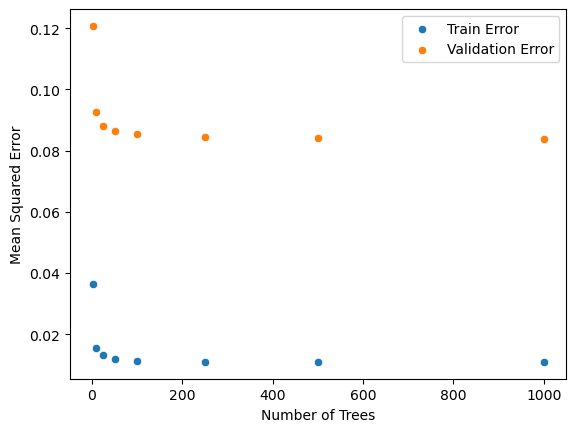

In [62]:
sns.scatterplot(data=forest_df, x='trees', y='train error', label='Train Error')
sns.scatterplot(data=forest_df, x='trees', y='validation error', label='Validation Error')

plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')